In [51]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
plt.rcParams['figure.figsize'] = [15, 10] 

# poisson distribution
def nextTime(rateParameter):
    return -math.log(1.0 - random.random()) / rateParameter

# generate data based on distribtion
def genData(param, show = False):
	a=[]
	if param[0]=="normal":
		mu, sigma, s = param[1],   param[2], param[3]
		a= np.random.normal(mu, sigma, size=s)
	elif param[0]=='uniform':
		mi, ma,s=param[1],   param[2], param[3]
		a= np.random.uniform(mi, ma, s)
	elif param[0]=="poisson":
		rate,s=param[1],   param[2]
		a = np.random.poisson(rate, s)
	if(show):
		count, bins, ignored = plt.hist(s, 14, density=True)
	return a

## Data with poisson distribution:
### Earthquake example\

If 13000 such earthquakes happen every year, it means that, on average, one earthquake happens every 40 minutes. So, let’s define a variable **λ = 1/40** and call it the rate parameter. The rate parameter λ is a measure of frequency: the average rate of events (in this case, earthquakes) per unit of time (in this case, minutes).

Knowing this, we can ask questions like, what is the probability that an earthquake will happen within the next minute? What’s the probability within the next 10 minutes? There’s a well-known function to answer such questions. It’s called the cumulative distribution function for the exponential distribution, and it looks like this.

The equation : 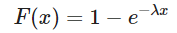


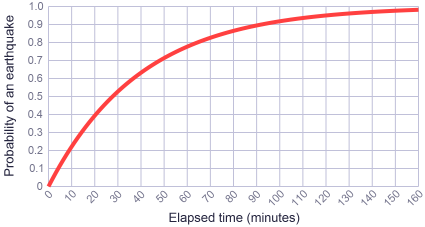




Donald Knuth describes a way to generate such values in §3.4.1 (D) of The Art of Computer Programming. Simply choose a random point on the y-axis between 0 and 1, distributed uniformly, and locate the corresponding time value on the x-axis. For example, if we choose the point 0.2 from the top of the graph, the time until our next earthquake would be 64.38 minutes.

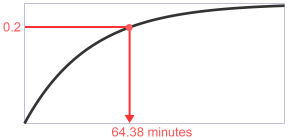

Given that the inverse of the exponential function is ln, it’s pretty easy to write this analytically, where U is the random value between 0 and 1:

**nextTime=−ln(U)/λ**, where U is a uinform random number between 0 and 1

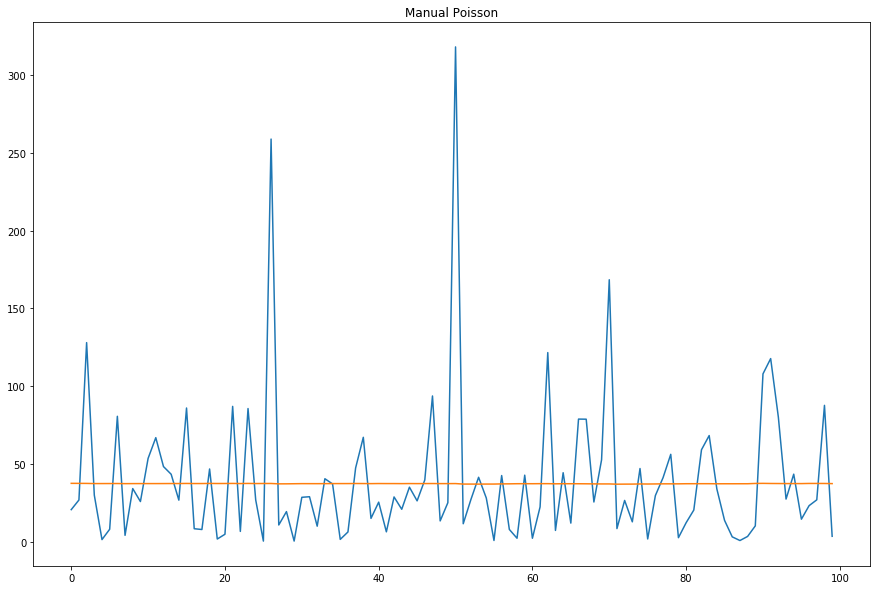

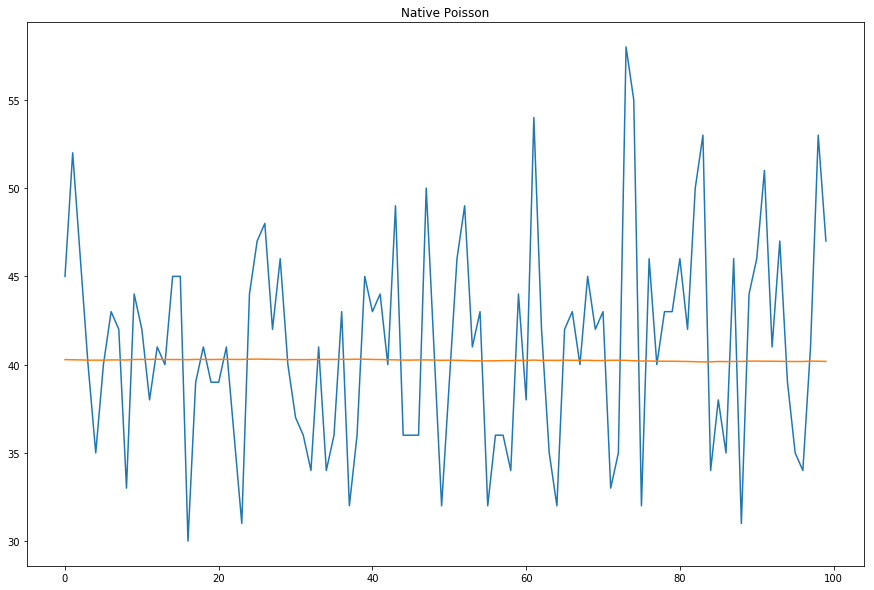

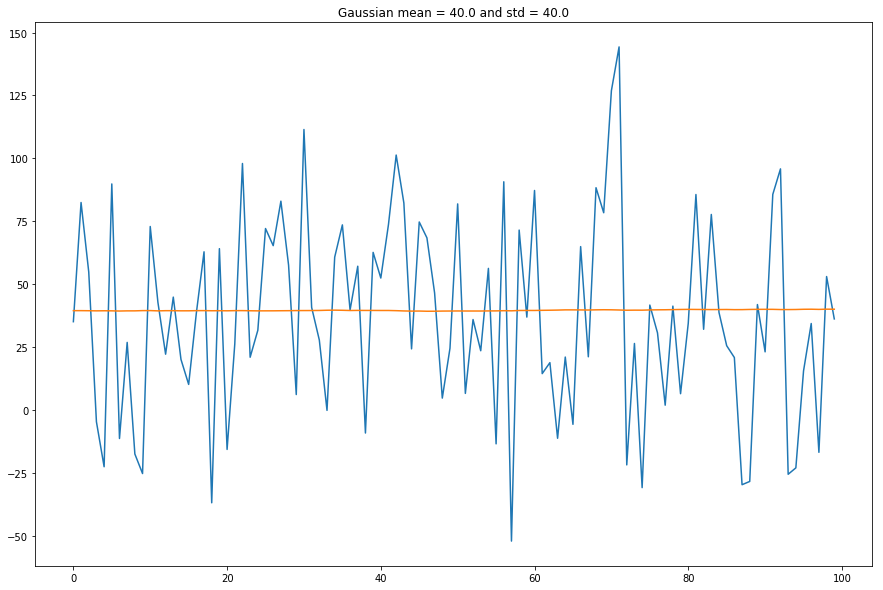

In [56]:
M = 40.0
Std = 40.0
S=1000000
WS = 1000
###########################################
a= ([nextTime(1/M) for i in range(S)])
b=np.convolve(a, np.ones((WS,))/WS, mode='valid')

plt.title("Manual Poisson")
plt.plot(a[:100])
plt.plot(b[:100])
plt.show()

###########################################
a= genData(["poisson", M, S] )
b=np.convolve(a, np.ones((WS,))/WS, mode='valid')

plt.title("Native Poisson")
plt.plot(a[:100])
plt.plot(b[:100])
plt.show()

###########################################
a= genData(["normal", M, Std,S] )
b=np.convolve(a, np.ones((WS,))/WS, mode='valid')
plt.title("Gaussian mean = "+ str(M) + " and std = " + str(Std))
plt.plot(a[:100])
plt.plot(b[:100])
plt.show()



In [54]:
len(a)

0

In [36]:
c=createSampleData()
plt.plot(c)

Creating sample data.


AttributeError: module 'random' has no attribute 'poisson'

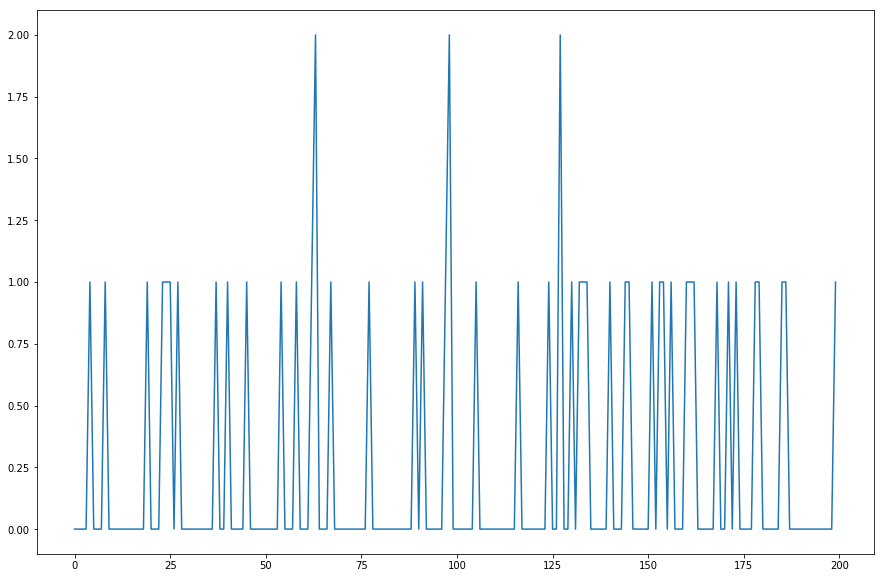

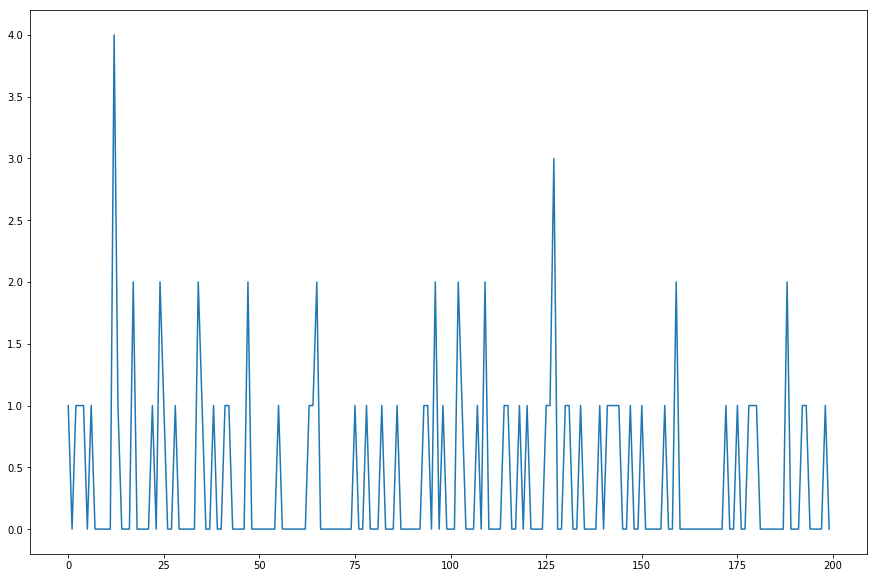

In [103]:
Period = 200
WS = 10
items = 4 
data = np.zeros(Period)
for i in range(int(Period/WS)):
    a= int(random.random()*items)+1
    
    #print(a)
    for j in range(a):
        b= int(random.random()*WS)
        data[WS*i+b]+=1
plt.plot(data)
plt.show()

data = np.zeros(Period)
kkk = genData(["normal", 4,2, int(Period/WS)])

for i in range(int(Period/WS)):
    a= int(random.random()*items)+1
    a=int(kkk[i])
    #print(a)
    for j in range(a):
        b= int(random.random()*WS)
        data[WS*i+b]+=1
plt.plot(data)
    

In [75]:
int(random.random()*4)

3